In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(10027, 32)
(10027, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 23] == 1)[0]
X_relative_footsteps_continuous_absolute_RL_swing = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_RL_swing = Y_relative_footsteps_continuous_absolute[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_continuous_absolute_RL_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.06422444,  0.12709958,
        0.02129842,  0.03284169,  0.00745874, -0.01805852,  0.235     ,
        0.187     , -0.405     ,  0.233     , -0.203     , -0.405     ,
       -0.261     ,  0.133     , -0.4       , -0.25      , -0.152     ,
       -0.401     ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        , -5.84216108, -0.23784905,
       -5.82474492, -0.26088653])

In [9]:
Y_relative_footsteps_continuous_absolute_RL_swing[0, :]

array([ 0.02641616, -0.00403748,  0.03441616, -0.00103748])

### Linear Regression

In [16]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RL_swing[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RL_swing[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9983558656378861
RMSE:  0.003195634643486386
The lowest error is:  6.800594863964893e-06
The highest error is:  0.01935480574699376
The avg. error is:  0.002214438367053286


In [17]:
model_rl_relative_swinging_x.coef_

array([[ 0.32740427, -0.05142719, -0.08826239, -0.13679047,  0.02924439,
         0.02948881,  0.01085036, -0.0059351 ,  0.1182178 , -0.27703602,
         0.40254209, -0.13025778,  0.04832223, -0.45960441,  0.04459591,
         0.31404968,  0.07177345]])

In [18]:
model_rl_relative_swinging_x.intercept_

array([-0.00203714])

Text(0, 0.5, 'Predictions')

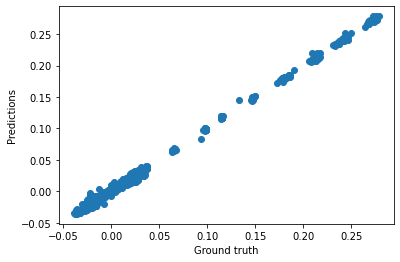

In [19]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [20]:
#%store model_rl_relative_swinging_x

In [21]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [22]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [31]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RL_swing[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RL_swing[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9969076724061938
RMSE:  0.0035270412420807633
The lowest error is:  5.963106117071182e-06
The highest error is:  0.021878542311655994
The avg. error is:  0.0024789160056709965


In [32]:
model_rl_relative_swinging_y.coef_

array([[-0.01804344,  0.35453721,  0.12839727, -0.01905046, -0.15119163,
        -0.21614303,  0.01034208,  0.06386109, -0.15750954,  0.34054433,
        -0.17589365,  0.09582321, -0.09387381,  0.00225342, -0.58275445,
         0.02364924, -0.03416471]])

In [33]:
model_rl_relative_swinging_y.intercept_

array([0.01608741])

Text(0, 0.5, 'Predictions')

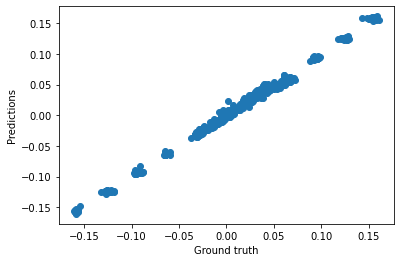

In [34]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [22]:
#%store model_rl_relative_swinging_y

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [21]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")